In [24]:
import requests
r=requests.get('https://news.yahoo.com')

In [4]:
r.text[:100]

"<html>\n<meta charset='utf-8'>\n<script>\nvar u='https://www.yahoo.com/?err=404&err_url=https%3a%2f%2fn"

In [7]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(r.text, 'html.parser')



import re

def visible(element):

    if element.parent.name in ['style', 'script', '[document]', 'head', 'title']:

        return False

    elif re.match('<!--.*-->', str(element.encode('utf-8'))):

        return False

    return True



page_text_list = []

for t in filter(visible, soup.findAll(text=True)):

    page_text_list.append(t)



page_text = "".join(page_text_list)

page_text[:80]



page_words = page_text.split()

print(len(page_words), page_words[:10])



import string

page_words2 = [w.strip(string.punctuation).lower() for w in page_words if

len(w.strip(string.punctuation))>0]

print(len(page_words2), page_words2[:10])

3286 ['News', "Today's", 'news', 'US', 'Politics', 'World', 'Tech', 'COVID-19', 'Climate', 'change']
3283 ['news', "today's", 'news', 'us', 'politics', 'world', 'tech', 'covid-19', 'climate', 'change']


In [8]:
from collections import Counter

page_word_freq = Counter(page_words2).most_common()

print(len(page_word_freq), page_word_freq[:10])

1525 [('the', 113), ('for', 81), ('a', 70), ('of', 65), ('and', 64), ('to', 62), ('your', 54), ('feedback', 51), ('read', 51), ('min', 50)]


(-0.5, 399.5, 199.5, -0.5)

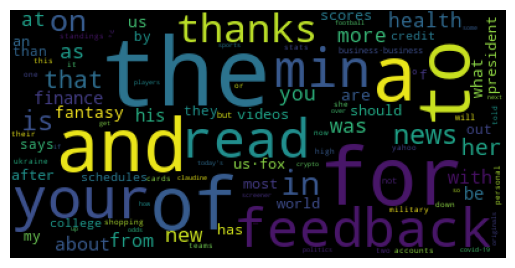

In [9]:
from os import path

import matplotlib.pyplot as plt

from wordcloud import WordCloud

dict_page_word_freq = {}

for i in page_word_freq:

    dict_page_word_freq[i[0]]=i[1]

wordcloud = WordCloud(max_words=100).fit_words(dict_page_word_freq)

plt.imshow(wordcloud)

plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

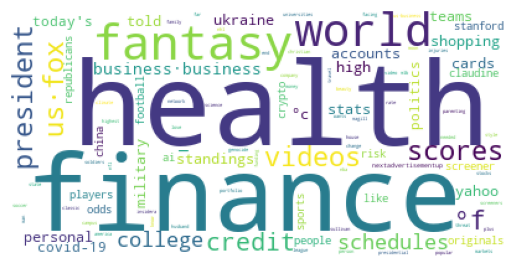

In [14]:
ENGLISH_STOP_WORDS = ["a", "about", "above", "across", "after", "afterwards",

"again", "against",

    "all", "almost", "alone", "along", "already", "also", "although", "always",

    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",

    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",

    "around", "as", "at", "back", "be", "became", "because", "become",

    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",

    "below", "beside", "besides", "between", "beyond", "bill", "both",

    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",

    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",

    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",

    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",

    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",

    "find", "fire", "first", "five", "for", "former", "formerly", "forty",

    "found", "four", "from", "front", "full", "further", "get", "give", "go",

    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",

    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",

    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",

    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",

    "latterly", "least", "less", "ltd", "made", "many", "may", "me",

    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",

    "move", "much", "must", "my", "myself", "name", "namely", "neither",

    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",

    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",

    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",

    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",

    "please", "put", "rather", "re", "same", "see", "seem", "seemed",

    "seeming", "seems", "serious", "several", "she", "should", "show", "side",

    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",

    "something", "sometime", "sometimes", "somewhere", "still", "such",

    "system", "take", "ten", "than", "that", "the", "their", "them",

    "themselves", "then", "thence", "there", "thereafter", "thereby",

    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",

    "third", "this", "those", "though", "three", "through", "throughout",

    "thru", "thus", "to", "together", "too", "top", "toward", "towards",

    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",

    "very", "via", "was", "we", "well", "were", "what", "whatever", "feedback", "thanks", "min", "read", "when",

    "whence", "whenever", "where", "whereafter", "whereas", "whereby",

    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",

    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",

    "within", "without", "would", "yet", "you", "your", "yours", "yourself",

    "yourselves", "new", "news", "says"]



##Check the effect of removing stopwords

word_freq_no_stop = [w for w in page_word_freq if w[0] not in ENGLISH_STOP_WORDS and not w[0].isdigit()]

dict_word_freq_no_stop = {}

for i in word_freq_no_stop:

    dict_word_freq_no_stop[i[0]]=i[1]





plt.imshow(wordcloud)

plt.axis("off")

wordcloud = WordCloud(background_color="white",max_words=100).fit_words(dict_word_freq_no_stop)



# Display the generated image, the matplotlib way:

plt.imshow(wordcloud)

plt.axis("off")

In [33]:
import requests
r=requests.get('https://www.pudelek.pl')

In [34]:
r.text[:100]

'<!DOCTYPE html><html lang="pl" style="font-size:62.5%"><head><meta charSet="utf-8"/><script>\n       '

In [35]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(r.text, 'html.parser')



import re

def visible(element):

    if element.parent.name in ['style', 'script', '[document]', 'head', 'title']:

        return False

    elif re.match('<!--.*-->', str(element.encode('utf-8'))):

        return False

    return True



page_text_list = []

for t in filter(visible, soup.findAll(text=True)):

    page_text_list.append(t)



page_text = "".join(page_text_list)

page_text[:80]



page_words = page_text.split()

print(len(page_words), page_words[:10])



import string

page_words2 = [w.strip(string.punctuation).lower() for w in page_words if

len(w.strip(string.punctuation))>0]

print(len(page_words2), page_words2[:10])

750 ['Trwa', 'ładowanie...Wyślij', 'donosZalogujwywiadynewsywideogaleriepaparazzipodcastlifestylehotwięcejcelebryciMałgorzata', 'RozenekNatalia', 'SiwiecKatarzyna', 'CichopekBarbara', 'Kurdej', 'SzatanDodaAnna', 'PrzybylskaAnna', 'MuchaKuba']
749 ['trwa', 'ładowanie...wyślij', 'donoszalogujwywiadynewsywideogaleriepaparazzipodcastlifestylehotwięcejcelebrycimałgorzata', 'rozeneknatalia', 'siwieckatarzyna', 'cichopekbarbara', 'kurdej', 'szatandodaanna', 'przybylskaanna', 'muchakuba']


In [36]:
from collections import Counter

page_word_freq = Counter(page_words2).most_common()

print(len(page_word_freq), page_word_freq[:10])

559 [('w', 19), ('godz', 17), ('z', 15), ('się', 15), ('na', 15), ('i', 12), ('o', 10), ('do', 7), ('nie', 6), ('tvp', 5)]


(-0.5, 399.5, 199.5, -0.5)

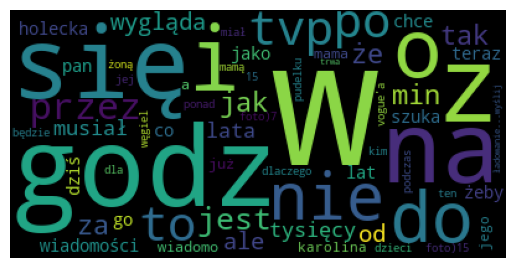

In [37]:
from os import path

import matplotlib.pyplot as plt

from wordcloud import WordCloud

dict_page_word_freq = {}

for i in page_word_freq:

    dict_page_word_freq[i[0]]=i[1]

wordcloud = WordCloud(max_words=100).fit_words(dict_page_word_freq)

plt.imshow(wordcloud)

plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

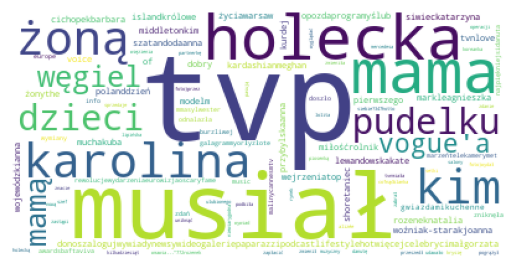

In [45]:
ENGLISH_STOP_WORDS = ["a", "szuka", "wiadomo", "foto)15", "chce", "miał", "wiadomości", "aby", "lata", "wygląda", "tysięcy", "foto)7", "min", "ładowanie...wyślij", "trwa", "ładowanie", "strony", "wyślij", "strona", "głowna", "ach", "acz", "godz", "aczkolwiek", "aj", "albo", "ale", "alez", "ależ", "ani", "az", "aż", "bardziej", "bardzo", "beda", "bedzie", "bez", "deda", "będą", "bede", "będę", "będzie", "bo", "bowiem", "by", "byc", "być", "byl", "byla", "byli", "bylo", "byly", "był", "była", "było", "były", "bynajmniej", "cala", "cali", "caly", "cała", "cały", "ci", "cie", "ciebie", "cię", "co", "cokolwiek", "cos", "coś", "czasami", "czasem", "czemu", "czy", "czyli", "daleko", "dla", "dlaczego", "dlatego", "do", "dobrze", "dokad", "dokąd", "dosc", "dość", "duzo", "dużo", "dwa", "dwaj", "dwie", "dwoje", "dzis", "dzisiaj", "dziś", "gdy", "gdyby", "gdyz", "gdyż", "gdzie", "gdziekolwiek", "gdzies", "gdzieś", "go", "i", "ich", "ile", "im", "inna", "inne", "inny", "innych", "iz", "iż", "ja", "jak", "jakas", "jakaś", "jakby", "jaki", "jakichs", "jakichś", "jakie", "jakis", "jakiś", "jakiz", "jakiż", "jakkolwiek", "jako", "jakos", "jakoś", "ją", "je", "jeden", "jedna", "jednak", "jednakze", "jednakże", "jedno", "jego", "jej", "jemu", "jesli", "jest", "jestem", "jeszcze", "jeśli", "jezeli", "jeżeli", "juz", "już", "kazdy", "każdy", "kiedy", "kilka", "kims", "kimś", "kto", "ktokolwiek", "ktora", "ktore", "ktorego", "ktorej", "ktory", "ktorych", "ktorym", "ktorzy", "ktos", "ktoś", "która", "które", "którego", "której", "który", "których", "którym", "którzy", "ku", "lat", "lecz", "lub", "ma", "mają", "mało", "mam", "mi", "miedzy", "między", "mimo", "mna", "mną", "mnie", "moga", "mogą", "moi", "moim", "moj", "moja", "moje", "moze", "mozliwe", "mozna", "może", "możliwe", "można", "mój", "mu", "musi", "my", "na", "nad", "nam", "nami", "nas", "nasi", "nasz", "nasza", "nasze", "naszego", "naszych", "natomiast", "natychmiast", "nawet", "nia", "nią", "nic", "nich", "nie", "niech", "niego", "niej", "niemu", "nigdy", "nim", "nimi", "niz", "niż", "no", "o", "obok", "od", "około", "on", "ona", "one", "oni", "ono", "oraz", "oto", "owszem", "pan", "pana", "pani", "po", "pod", "podczas", "pomimo", "ponad", "poniewaz", "ponieważ", "powinien", "powinna", "powinni", "powinno", "poza", "prawie", "przeciez", "przecież", "przed", "przede", "przedtem", "przez", "przy", "roku", "rowniez", "również", "sam", "sama", "są", "sie", "się", "skad", "skąd", "soba", "sobą", "sobie", "sposob", "sposób", "swoje", "ta", "tak", "taka", "taki", "takie", "takze", "także", "tam", "te", "tego", "tej", "ten", "teraz", "też", "to", "toba", "tobą", "tobie", "totez", "toteż", "totobą", "trzeba", "tu", "tutaj", "twoi", "twoim", "twoj", "twoja", "twoje", "twój", "twym", "ty", "tych", "tylko", "tym", "u", "w", "wam", "wami", "was", "wasz", "wasza", "wasze", "we", "według", "wiele", "wielu", "więc", "więcej", "wlasnie", "właśnie", "wszyscy", "wszystkich", "wszystkie", "wszystkim", "wszystko", "wtedy", "wy", "z", "za", "zaden", "zadna", "zadne", "zadnych", "zapewne", "zawsze", "ze", "zeby", "zeznowu", "zł", "znow", "znowu", "znów", "zostal", "został", "żaden", "żadna", "żadne", "żadnych", "że", "żeby"]



##Check the effect of removing stopwords

word_freq_no_stop = [w for w in page_word_freq if w[0] not in ENGLISH_STOP_WORDS and not w[0].isdigit()]

dict_word_freq_no_stop = {}

for i in word_freq_no_stop:

    dict_word_freq_no_stop[i[0]]=i[1]





plt.imshow(wordcloud)

plt.axis("off")

wordcloud = WordCloud(background_color="white",max_words=100).fit_words(dict_word_freq_no_stop)



# Display the generated image, the matplotlib way:

plt.imshow(wordcloud)

plt.axis("off")

In [46]:
import requests
r=requests.get('https://search.savills.com/list/property-for-sale/europe?tracking=true&functional=true')

In [47]:
r.text[:1000]

'<!DOCTYPE html><html lang="en"><head><script src="https://savills-auth-redirect-prod.s3.eu-west-1.amazonaws.com/auth-redirect.js"></script><style id="inline-styles">.sv-busy,.sv-cta-link>a,.sv-header__tool-action span,.sv-nav__close span,.sv-property-attribute,.sv-tag__close{display:inline-block;position:relative}.sv-busy:after,.sv-cta-link>a:after,.sv-header__tool-action span:after,.sv-nav__close span:after,.sv-property-attribute:after,.sv-tag__close:after{background-position:50% 50%;background-repeat:no-repeat;content:"";display:block;position:absolute;speak:none;top:50%;transform:translateY(-50%)}.sv-text-copy a{color:#313131;font-weight:500;position:relative;text-decoration:none}.sv-text-copy a:after,.sv-text-copy a:before{bottom:-1px;content:"";display:block;height:.125rem;left:0;position:absolute;width:100%}.sv-text-copy a:before{background-color:#ffdf00}.sv-text-copy a:after{background-color:#313131;width:0}h1,h2,h3,h4,h6{font-weight:300;margin-top:0}.sv-list li,.sv-text-copy{m